# Corona Virus Infection Probability

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#### Importing training data

In [103]:
df = pd.read_excel (r'Train_dataset.xlsx')
df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [185]:
df1 = pd.read_excel (r'Test_dataset.xlsx')
df1.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1


## Data Cleaning

In [104]:
df.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10403.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.062770,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.818222,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


In [105]:
df.shape

(10714, 28)

#### Finding the number of missing elements in each column

In [149]:
train_df = df.drop(['people_ID', 'Designation','Name'], axis = 1) 
train_df.head()

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,Hypertension,68,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,Bhubaneshwar,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,64,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,Bhubaneshwar,Female,NO,1.0,Cleaner,Public,2,0,None,19,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,Bhubaneshwar,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,Bhubaneshwar,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [186]:
test_df = df1.drop(['Designation','Name'], axis = 1) 
test_df.head()

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,YES,2,Driver,Public,4,1,Diabetes,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,YES,2,Legal,Walk,4,1,Diabetes,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,YES,2,Sales,Car,4,1,Diabetes,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,YES,2,Sales,Car,4,1,None,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,YES,2,Business,Car,4,1,Diabetes,...,109,207,312,94,68,39,5,2300000,1500000,1


In [150]:
train_df['total_missing'] = 26-train_df.apply(lambda x: x.count(), axis=1)
train_df.head()

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,total_missing
0,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,Hypertension,68,...,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,1
1,Bhubaneshwar,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,64,...,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,2
2,Bhubaneshwar,Female,NO,1.0,Cleaner,Public,2,0,None,19,...,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000,1
3,Bhubaneshwar,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,...,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,1
4,Bhubaneshwar,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,...,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800,1


In [151]:
train_df.shape

(10714, 26)

#### Dropping the rows having more than 3 missing values

In [152]:
train_df.drop(train_df[train_df['total_missing'] > 3].index, inplace = True) 
train_df.shape

(9539, 26)

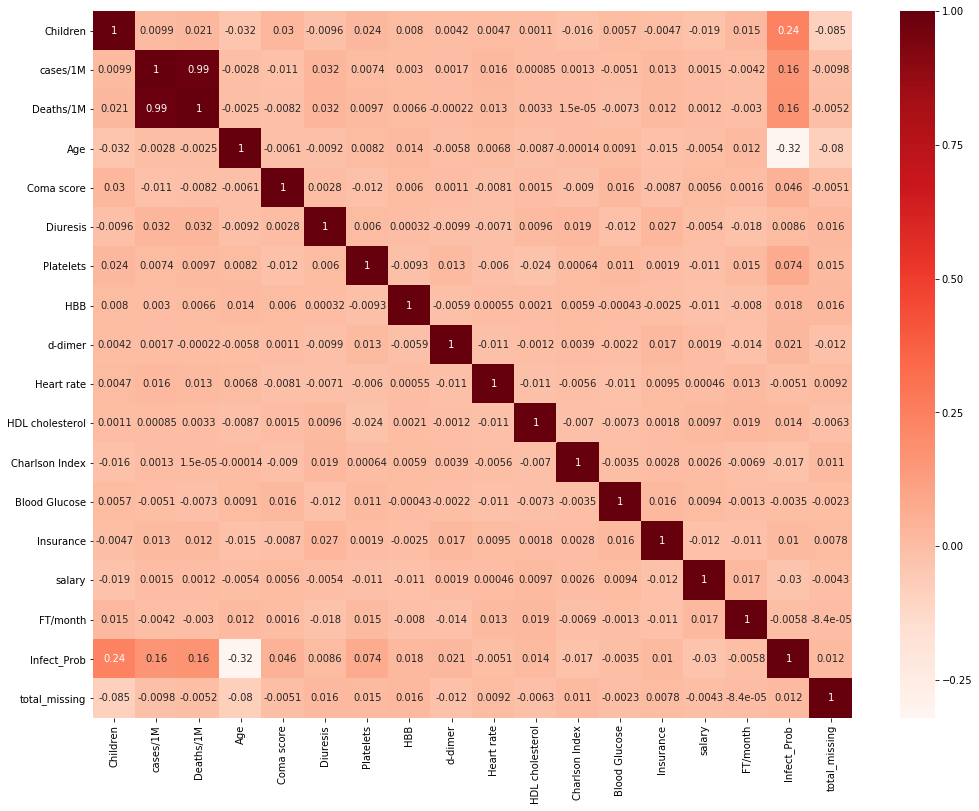

In [153]:
#Using Pearson Correlation
plt.figure(figsize=(17,13))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Since cause/1M and Deaths/1M are highly coorelated, one of them can be removed

In [154]:
train_df = train_df.drop(['cases/1M'], axis = 1) 

In [187]:
test_df = test_df.drop(['cases/1M'], axis = 1) 

### Handling missing data

In [155]:
train_df.isna().sum()

Region                      0
Gender                      0
Married                     0
Children                   44
Occupation                480
Mode_transport              3
Deaths/1M                   0
comorbidity               226
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure     97
Diuresis                  716
Platelets                  16
HBB                        16
d-dimer                   206
Heart rate                206
HDL cholesterol            35
Charlson Index              0
Blood Glucose               0
Insurance                 823
salary                      0
FT/month                  723
Infect_Prob                 0
total_missing               0
dtype: int64

#### Filling missing data with appropriate value

In [156]:
train_df['Children'] = train_df['Children'].fillna(0)
train_df['Insurance'] = train_df['Insurance'].fillna(0)
train_df['FT/month'] = train_df['FT/month'].fillna(0)
train_df['Diuresis'] = train_df['Diuresis'].fillna(train_df['Diuresis'].mean())
train_df['Platelets'] = train_df['Platelets'].fillna(train_df['Platelets'].mean())
train_df['HBB'] = train_df['HBB'].fillna(train_df['HBB'].mean())
train_df['d-dimer'] = train_df['d-dimer'].fillna(train_df['d-dimer'].mean())
train_df['Heart rate'] = train_df['Heart rate'].fillna(train_df['Heart rate'].mean())
train_df['HDL cholesterol'] = train_df['HDL cholesterol'].fillna(train_df['HDL cholesterol'].mean())
train_df.isna().sum()

Region                      0
Gender                      0
Married                     0
Children                    0
Occupation                480
Mode_transport              3
Deaths/1M                   0
comorbidity               226
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure     97
Diuresis                    0
Platelets                   0
HBB                         0
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Blood Glucose               0
Insurance                   0
salary                      0
FT/month                    0
Infect_Prob                 0
total_missing               0
dtype: int64

In [189]:
test_df['Children'] = test_df['Children'].fillna(0)
test_df['Insurance'] = test_df['Insurance'].fillna(0)
test_df['FT/month'] = test_df['FT/month'].fillna(0)
test_df['Diuresis'] = test_df['Diuresis'].fillna(train_df['Diuresis'].mean())
test_df['Platelets'] = test_df['Platelets'].fillna(train_df['Platelets'].mean())
test_df['HBB'] = test_df['HBB'].fillna(train_df['HBB'].mean())
test_df['d-dimer'] = test_df['d-dimer'].fillna(train_df['d-dimer'].mean())
test_df['Heart rate'] = test_df['Heart rate'].fillna(train_df['Heart rate'].mean())
test_df['HDL cholesterol'] = test_df['HDL cholesterol'].fillna(train_df['HDL cholesterol'].mean())

In [157]:
lb_enc = LabelEncoder()
train_df['Gender'] = lb_enc.fit_transform(train_df['Gender'])
train_df['Married'] = lb_enc.fit_transform(train_df['Married'])
train_df.head()

,Region,Gender,Married,Children,Occupation,Mode_transport,Deaths/1M,comorbidity,Age,Coma score,...,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,total_missing
0,Bhubaneshwar,0,1,1.0,Farmer,Public,0,Hypertension,68,8,...,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,1
1,Bhubaneshwar,0,1,2.0,Farmer,Walk,0,Diabetes,64,15,...,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,2
2,Bhubaneshwar,0,0,1.0,Cleaner,Public,0,None,19,13,...,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000,1
3,Bhubaneshwar,0,1,1.0,Driver,Car,0,Coronary Heart Disease,33,9,...,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,1
4,Bhubaneshwar,0,0,2.0,Manufacturing,Car,0,Diabetes,23,7,...,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800,1


In [191]:
test_df['Gender'] = lb_enc.fit_transform(test_df['Gender'])
test_df['Married'] = lb_enc.fit_transform(test_df['Married'])
test_df.head()

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,Deaths/1M,comorbidity,Age,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,0,1,2,Driver,Public,1,Diabetes,52,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,1,1,2,Legal,Walk,1,Diabetes,53,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,0,1,2,Sales,Car,1,Diabetes,35,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,0,1,2,Sales,Car,1,None,31,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,0,1,2,Business,Car,1,Diabetes,51,...,109,207,312,94,68,39,5,2300000,1500000,1


#### Looking at the data types of all the columns

#### Since there are object data types we need to convert them to numeric data

In [158]:
train_df = pd.get_dummies(train_df, columns = ['Region'] )
train_df = pd.get_dummies(train_df, columns = ['Occupation'] )
train_df = pd.get_dummies(train_df, columns = ['Mode_transport'] )
train_df = pd.get_dummies(train_df, columns = ['comorbidity'] )
train_df = pd.get_dummies(train_df, columns = ['cardiological pressure'] )
train_df.head()

,Gender,Married,Children,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,...,Mode_transport_Public,Mode_transport_Walk,comorbidity_Coronary Heart Disease,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,0,1,1.0,0,68,8,<400,441.000000,154.0,93.0,...,1,0,0,0,1,0,0,1,0,0
1,0,1,2.0,0,64,15,<100,279.182364,121.0,56.0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,1.0,0,19,13,<300,416.000000,124.0,137.0,...,1,0,0,0,0,1,1,0,0,0
3,0,1,1.0,0,33,9,<200,410.000000,98.0,167.0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,2.0,0,23,7,<400,390.000000,21.0,153.0,...,0,0,0,1,0,0,0,1,0,0


In [192]:
test_df = pd.get_dummies(test_df, columns = ['Region'] )
test_df = pd.get_dummies(test_df, columns = ['Occupation'] )
test_df = pd.get_dummies(test_df, columns = ['Mode_transport'] )
test_df = pd.get_dummies(test_df, columns = ['comorbidity'] )
test_df = pd.get_dummies(test_df, columns = ['cardiological pressure'] )

In [163]:
train_df['Pulmonary score'] = train_df['Pulmonary score'].replace(regex=['^.'],value='')

In [169]:
train_df['Pulmonary score']=train_df['Pulmonary score'].astype(str).astype(int)

In [193]:
test_df['Pulmonary score'] = test_df['Pulmonary score'].replace(regex=['^.'],value='')
test_df['Pulmonary score']=test_df['Pulmonary score'].astype(str).astype(int)

In [170]:
train_df.dtypes

Gender                                  int64
Married                                 int64
Children                              float64
Deaths/1M                               int64
Age                                     int64
Coma score                              int64
Pulmonary score                         int64
Diuresis                              float64
Platelets                             float64
HBB                                   float64
d-dimer                               float64
Heart rate                            float64
HDL cholesterol                       float64
Charlson Index                          int64
Blood Glucose                           int64
Insurance                             float64
salary                                  int64
FT/month                              float64
Infect_Prob                           float64
total_missing                           int64
Region_Bengaluru                        uint8
Region_Bhubaneshwar               

In [174]:
train_df.head()

,Gender,Married,Children,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,...,Mode_transport_Public,Mode_transport_Walk,comorbidity_Coronary Heart Disease,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,0,1,1.0,0,68,8,400,441.000000,154.0,93.0,...,1,0,0,0,1,0,0,1,0,0
1,0,1,2.0,0,64,15,100,279.182364,121.0,56.0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,1.0,0,19,13,300,416.000000,124.0,137.0,...,1,0,0,0,0,1,1,0,0,0
3,0,1,1.0,0,33,9,200,410.000000,98.0,167.0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,2.0,0,23,7,400,390.000000,21.0,153.0,...,0,0,0,1,0,0,0,1,0,0


In [183]:
min_max_scaler = preprocessing.MinMaxScaler()
train_df['Age'] = min_max_scaler.fit_transform(train_df['Age'].values.reshape(-1,1))
train_df['Coma score'] = min_max_scaler.fit_transform(train_df['Coma score'].values.reshape(-1,1))
train_df['Pulmonary score'] = min_max_scaler.fit_transform(train_df['Pulmonary score'].values.reshape(-1,1))
train_df['Diuresis'] = min_max_scaler.fit_transform(train_df['Diuresis'].values.reshape(-1,1))
train_df['Platelets'] = min_max_scaler.fit_transform(train_df['Platelets'].values.reshape(-1,1))
train_df['HBB'] = min_max_scaler.fit_transform(train_df['HBB'].values.reshape(-1,1))
train_df['d-dimer'] = min_max_scaler.fit_transform(train_df['d-dimer'].values.reshape(-1,1))
train_df['Heart rate'] = min_max_scaler.fit_transform(train_df['Heart rate'].values.reshape(-1,1))
train_df['HDL cholesterol'] = min_max_scaler.fit_transform(train_df['HDL cholesterol'].values.reshape(-1,1))
train_df['Charlson Index'] = min_max_scaler.fit_transform(train_df['Charlson Index'].values.reshape(-1,1))
train_df['Blood Glucose'] = min_max_scaler.fit_transform(train_df['Blood Glucose'].values.reshape(-1,1))
train_df['Insurance'] = min_max_scaler.fit_transform(train_df['Insurance'].values.reshape(-1,1))
train_df['salary'] = min_max_scaler.fit_transform(train_df['salary'].values.reshape(-1,1))
train_df['FT/month'] = min_max_scaler.fit_transform(train_df['FT/month'].values.reshape(-1,1))
train_df['FT/month'] = min_max_scaler.fit_transform(train_df['FT/month'].values.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

In [195]:
test_df['Age'] = min_max_scaler.fit_transform(test_df['Age'].values.reshape(-1,1))
test_df['Coma score'] = min_max_scaler.fit_transform(test_df['Coma score'].values.reshape(-1,1))
test_df['Pulmonary score'] = min_max_scaler.fit_transform(test_df['Pulmonary score'].values.reshape(-1,1))
test_df['Diuresis'] = min_max_scaler.fit_transform(test_df['Diuresis'].values.reshape(-1,1))
test_df['Platelets'] = min_max_scaler.fit_transform(test_df['Platelets'].values.reshape(-1,1))
test_df['HBB'] = min_max_scaler.fit_transform(test_df['HBB'].values.reshape(-1,1))
test_df['d-dimer'] = min_max_scaler.fit_transform(test_df['d-dimer'].values.reshape(-1,1))
test_df['Heart rate'] = min_max_scaler.fit_transform(test_df['Heart rate'].values.reshape(-1,1))
test_df['HDL cholesterol'] = min_max_scaler.fit_transform(test_df['HDL cholesterol'].values.reshape(-1,1))
test_df['Charlson Index'] = min_max_scaler.fit_transform(test_df['Charlson Index'].values.reshape(-1,1))
test_df['Blood Glucose'] = min_max_scaler.fit_transform(test_df['Blood Glucose'].values.reshape(-1,1))
test_df['Insurance'] = min_max_scaler.fit_transform(test_df['Insurance'].values.reshape(-1,1))
test_df['salary'] = min_max_scaler.fit_transform(test_df['salary'].values.reshape(-1,1))
test_df['FT/month'] = min_max_scaler.fit_transform(test_df['FT/month'].values.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

In [243]:
train_df.head()

,Gender,Married,Children,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,...,Mode_transport_Public,Mode_transport_Walk,comorbidity_Coronary Heart Disease,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,0,1,1.0,0,1.000000,0.416667,1.000000,0.973529,0.958621,0.384211,...,1,0,0,0,1,0,0,1,0,0
1,0,1,2.0,0,0.923077,1.000000,0.000000,0.497595,0.731034,0.189474,...,0,1,0,1,0,0,0,0,0,1
2,0,0,1.0,0,0.057692,0.833333,0.666667,0.900000,0.751724,0.615789,...,1,0,0,0,0,1,1,0,0,0
3,0,1,1.0,0,0.326923,0.500000,0.333333,0.882353,0.572414,0.773684,...,0,0,1,0,0,0,0,0,1,0
4,0,0,2.0,0,0.134615,0.333333,1.000000,0.823529,0.041379,0.700000,...,0,0,0,1,0,0,0,1,0,0


In [239]:
y_train = train_df['Infect_Prob']
x_train = train_df.drop(['Infect_Prob'], axis = 1)
x_test = test_df.drop(['people_ID'], axis = 1)

In [232]:
train_df.dtypes

Gender                                  int64
Married                                 int64
Children                              float64
Deaths/1M                               int64
Age                                   float64
Coma score                            float64
Pulmonary score                       float64
Diuresis                              float64
Platelets                             float64
HBB                                   float64
d-dimer                               float64
Heart rate                            float64
HDL cholesterol                       float64
Charlson Index                        float64
Blood Glucose                         float64
Insurance                             float64
salary                                float64
FT/month                              float64
Infect_Prob                           float64
total_missing                           int64
Region_Bengaluru                        uint8
Region_Bhubaneshwar               

In [206]:
from sklearn.svm import SVR

In [207]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [208]:
y_pred = regressor.predict(x_test)

In [217]:
print(y_pred)

[54.20644372 53.94695805 54.03607199 ... 43.81978181 43.71231776
 43.53119657]


In [226]:
output_df = pd.DataFrame(test_df['people_ID'])
output_df['Infect_Prob'] = y_pred
output_df.head()

,people_ID,Infect_Prob
0,5942,54.206444
1,18664,53.946958
2,5603,54.036072
3,5649,53.906963
4,5099,54.042253


In [252]:
output_df.to_excel("output.xlsx") 